In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mglearn
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)
plt.rcParams['font.sans-serif']=['Times New Roman']
plt.rc('axes', unicode_minus=False)
#建立Features
datasets=pd.read_table("PEER_Dataset.txt",sep='\s+')
datasets=pd.DataFrame(datasets)
feature=datasets.iloc[:,0:13]
#特征归一化
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# scaler=MinMaxScaler(feature_range=(0,1))
# feature=scaler.fit_transform(feature)

# scaler = StandardScaler()
# feature=scaler.fit_transform(feature)

feature=pd.DataFrame(feature)

#建立Targets
target=[]
labels=["Flexure","Flexure-Shear","Shear"]
for i in datasets.iloc[:,13]:
    if i=="Flexure":
        target.append(0)
    if i == "Flexure-Shear":
        target.append(1)
    if i=="Shear":
        target.append(2)

#样本划分
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(feature,target,random_state=666,test_size=0.3)

draw_color=np.array([])
for i in target:
    if i==0:
        draw_color=np.append(draw_color,'#283c63')
    if i==1:
        draw_color=np.append(draw_color,'#07689f')
    if i==2:
        draw_color=np.append(draw_color,'#f85f73')

Principal Component Analysis，PCA

In [70]:
%matplotlib qt
%matplotlib inline
from sklearn.decomposition import PCA
from mpl_toolkits import mplot3d
from collections import OrderedDict

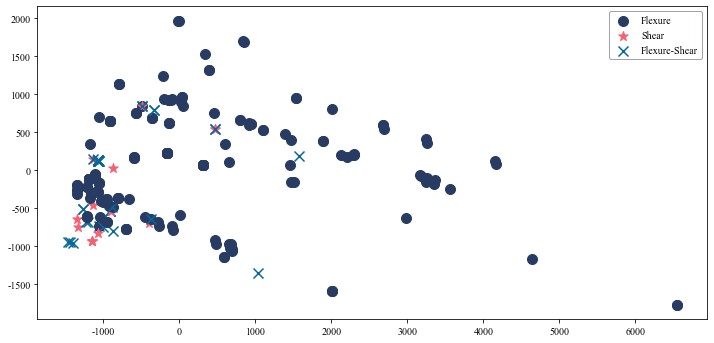

In [71]:
pca=PCA(n_components=2,whiten=False)
pca.fit(feature)

X_pca=pca.transform(feature)
fig = plt.figure(figsize=(12,12))

for i,j in enumerate(target):
    if j==0:
       plt.scatter(X_pca[i,0],X_pca[i,1],c='#283c63',marker='o',s=100,label='Flexure') 
    if j==1:
       plt.scatter(X_pca[i,0],X_pca[i,1],c='#07689f',marker='x',s=100,label='Flexure-Shear') 
    if j==2:
       plt.scatter(X_pca[i,0],X_pca[i,1],c='#f85f73',marker='*',s=100,label='Shear')

handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(),edgecolor='#928a97',facecolor='none',loc='best')
plt.gca().set_aspect('equal')

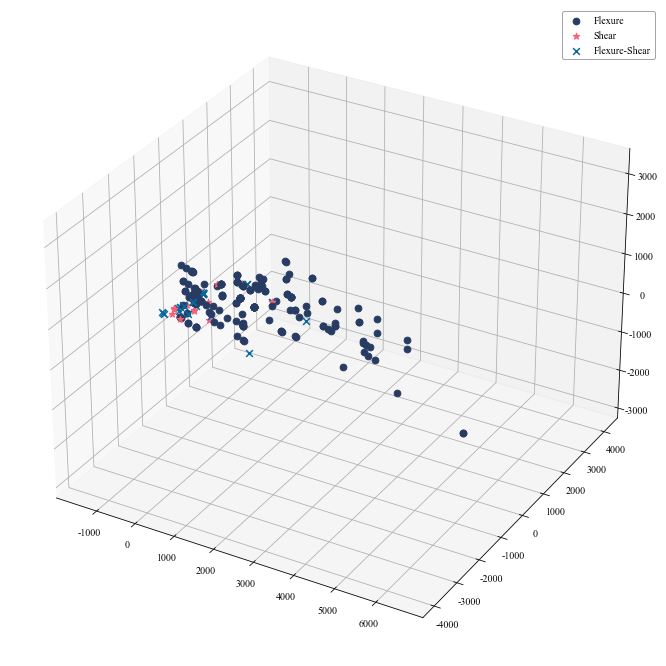

In [72]:
pca=PCA(n_components=3)
pca.fit(feature)
X_pca=pca.transform(feature)

fig = plt.figure(figsize=(12,12))
ax = plt.axes(projection='3d')

for i,j in enumerate(target):
    if j==0:
       ax.scatter3D(X_pca[i,0], X_pca[i,1], X_pca[i,2],c='#283c63',marker='o',s=45,label='Flexure') 
    if j==1:
       ax.scatter3D(X_pca[i,0], X_pca[i,1], X_pca[i,2],c='#07689f',marker='x',s=45,label='Flexure-Shear') 
    if j==2:
       ax.scatter3D(X_pca[i,0], X_pca[i,1], X_pca[i,2],c='#f85f73',marker='*',s=45,label='Shear')

handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(),edgecolor='#928a97',facecolor='none',loc='best')
plt.gca().set_aspect('equal')

c:\Users\Ashen\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\plotting\_matplotlib\misc.py:96: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(


array([[<AxesSubplot: xlabel='0', ylabel='0'>,
        <AxesSubplot: xlabel='1', ylabel='0'>,
        <AxesSubplot: xlabel='2', ylabel='0'>,
        <AxesSubplot: xlabel='3', ylabel='0'>],
       [<AxesSubplot: xlabel='0', ylabel='1'>,
        <AxesSubplot: xlabel='1', ylabel='1'>,
        <AxesSubplot: xlabel='2', ylabel='1'>,
        <AxesSubplot: xlabel='3', ylabel='1'>],
       [<AxesSubplot: xlabel='0', ylabel='2'>,
        <AxesSubplot: xlabel='1', ylabel='2'>,
        <AxesSubplot: xlabel='2', ylabel='2'>,
        <AxesSubplot: xlabel='3', ylabel='2'>],
       [<AxesSubplot: xlabel='0', ylabel='3'>,
        <AxesSubplot: xlabel='1', ylabel='3'>,
        <AxesSubplot: xlabel='2', ylabel='3'>,
        <AxesSubplot: xlabel='3', ylabel='3'>]], dtype=object)

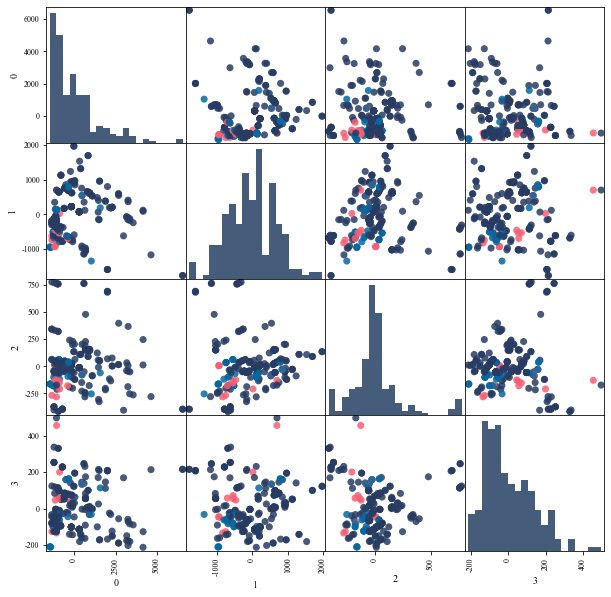

In [73]:
pca=PCA(n_components=4)
pca.fit(feature)
X_pca=pca.transform(feature)
X_pca=pd.DataFrame(X_pca)
pd.plotting.scatter_matrix(X_pca,figsize=(10,10),diagonal='hist',hist_kwds={'bins':20,'color':'#455d7a'},cmap=mglearn.cm3,marker="o",c=draw_color,s=50,alpha=0.85)

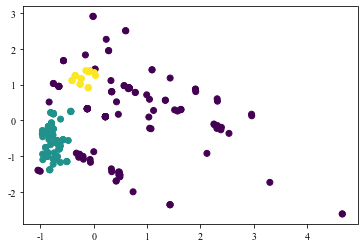

In [78]:
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
pca=PCA(n_components=2,whiten=True)
pca.fit(feature)
X_pca=pca.transform(feature)
y_pred = KMeans(n_clusters=3,init="random",max_iter=1000).fit_predict(X_pca)
# plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred)

model=DBSCAN(eps=0.3 ,min_samples=20,metric='euclidean').fit(X_pca)
y_pred = model.fit_predict(X_pca)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred)